In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Flatten, Dropout

print("Packages Successfully Imported!")

Packages Successfully Imported!


In [2]:
trainDataGen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
trainingSet = trainDataGen.flow_from_directory("dataset/train", target_size = (128, 128), batch_size = 32, class_mode = "binary")

Found 2800 images belonging to 2 classes.


In [6]:
trainingSet.class_indices

{'no': 0, 'yes': 1}

In [4]:
validDataGen = ImageDataGenerator(rescale = 1./255)
validSet = validDataGen.flow_from_directory("dataset/valid", target_size = (128, 128), batch_size = 32, class_mode = "binary")

Found 200 images belonging to 2 classes.


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, input_shape=(128, 128, 3), activation ='relu', padding = 'Same'))
model.add(Conv2D(32, kernel_size = 3,  activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = 3, activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = 3, activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2, strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(loss = "binary_crossentropy", optimizer='Adamax', metrics=["accuracy"])

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        3

In [8]:
metricVals = model.fit(x = trainingSet, validation_data = validSet, epochs = 35, verbose = 2)

Epoch 1/35
88/88 - 294s - loss: 4.8625 - accuracy: 0.6800 - val_loss: 6.1032 - val_accuracy: 0.5050
Epoch 2/35
88/88 - 282s - loss: 0.5698 - accuracy: 0.7707 - val_loss: 4.4634 - val_accuracy: 0.5150
Epoch 3/35
88/88 - 278s - loss: 0.4294 - accuracy: 0.7979 - val_loss: 2.5949 - val_accuracy: 0.6150
Epoch 4/35
88/88 - 1482s - loss: 0.3934 - accuracy: 0.8329 - val_loss: 1.7917 - val_accuracy: 0.6850
Epoch 5/35
88/88 - 259s - loss: 0.3630 - accuracy: 0.8532 - val_loss: 1.3190 - val_accuracy: 0.6800
Epoch 6/35
88/88 - 216s - loss: 0.3096 - accuracy: 0.8675 - val_loss: 1.0977 - val_accuracy: 0.6550
Epoch 7/35
88/88 - 220s - loss: 0.2812 - accuracy: 0.8839 - val_loss: 0.6609 - val_accuracy: 0.7650
Epoch 8/35
88/88 - 224s - loss: 0.2360 - accuracy: 0.8996 - val_loss: 0.5573 - val_accuracy: 0.7850
Epoch 9/35
88/88 - 224s - loss: 0.2353 - accuracy: 0.9032 - val_loss: 0.5398 - val_accuracy: 0.8200
Epoch 10/35
88/88 - 225s - loss: 0.2030 - accuracy: 0.9175 - val_loss: 0.2928 - val_accuracy: 0.925

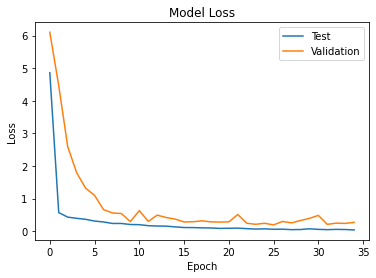

In [9]:
plt.plot(metricVals.history['loss'])
plt.plot(metricVals.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

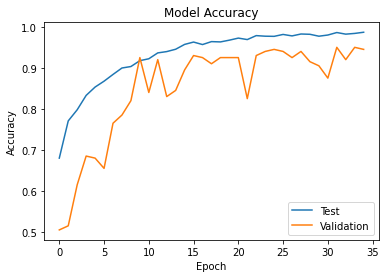

In [10]:
plt.plot(metricVals.history['accuracy'])
plt.plot(metricVals.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

In [11]:
model.save("BrainTumorClassifier.h5")

In [12]:
cnn = load_model("BrainTumorClassifier.h5")

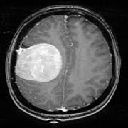

100.0 % chance of Brain Tumor.
Yes


In [13]:
# Yes 1
test = image.load_img("dataset/test/Y1.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

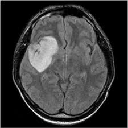

99.99991655349731 % chance of Brain Tumor.
Yes


In [14]:
# Yes 2
test = image.load_img("dataset/test/Y2.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

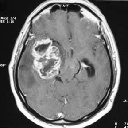

100.0 % chance of Brain Tumor.
Yes


In [15]:
# Yes 3
test = image.load_img("dataset/test/Y3.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

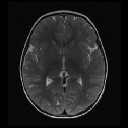

5.6766418765619164e-05 % chance of Brain Tumor.
No


In [16]:
# No 1
test = image.load_img("dataset/test/N1.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

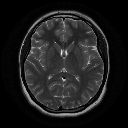

0.012794137001037598 % chance of Brain Tumor.
No


In [17]:
# No 2
test = image.load_img("dataset/test/N2.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

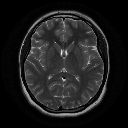

0.012794137001037598 % chance of Brain Tumor.
No


In [18]:
# No 3
test = image.load_img("dataset/test/N2.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")